### Подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

Загрузим данные и подготовим их к анализу

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Проверим данные всех трех таблиц на "чистоту": ошибки, пропуски. Для этого применим методы info и describe к каждому датофрейму

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.duplicated().sum()

0

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.duplicated().sum()

0

In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
costs.duplicated().sum()

0

Пропусков в данных нет, надо изменить тип данных в некоторых столбцах, привести все буквы к нижнему регистру и внести корректировки в названия столбцов для дальнейшего удобства

In [12]:
#Приведем названия столбцов к нижнему регистру и вместо пробелов поставим нижнее подчеркивание
visits.columns=['device', 'end_ts', 'source_id', 'starts_ts', 'uid']
visits.head()

,device,end_ts,source_id,starts_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [13]:
#изменим формат даты с object на datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'],format="%Y-%m-%d %H:%M")
visits['starts_ts'] = pd.to_datetime(visits['starts_ts'],format="%Y-%m-%d %H:%M")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
starts_ts    359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [14]:
#В таблице с информацией о заказах также приведем названия столбцов к нижнему регистру и 
#добавим нижнее подчеркивание вместо пробела. Приведем столбец с датой к нужному типу datetime
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'],format="%Y-%m-%d %H:%M")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


В таблице с маркетинговыми затратами изменим тип данных.

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'],format="%Y-%m-%d %H:%M")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Построим отчеты и посчитаем метрики

### 1. Продукт

### 1.1. Сколько людей пользуются в день, неделю, месяц (DAU, WAU, MAU)?

In [16]:
# Добавим в таблицу колонки с датой, неделей, месяцем, годом
visits['session_date'] = visits['starts_ts'].dt.date.astype('datetime64')
visits['session_week'] = visits['starts_ts'].dt.week
visits['session_month'] = visits['starts_ts'].astype('datetime64[M]')
visits['session_year'] = visits['starts_ts'].dt.year

In [17]:
visits.head()

,device,end_ts,source_id,starts_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017


In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
device           359400 non-null object
end_ts           359400 non-null datetime64[ns]
source_id        359400 non-null int64
starts_ts        359400 non-null datetime64[ns]
uid              359400 non-null uint64
session_date     359400 non-null datetime64[ns]
session_week     359400 non-null int64
session_month    359400 non-null datetime64[ns]
session_year     359400 non-null int64
dtypes: datetime64[ns](4), int64(3), object(1), uint64(1)
memory usage: 24.7+ MB


In [19]:
#Посчитаем среднее количество уникальных пользователей в день
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
int(dau_total)

907

In [20]:
#Посмотрим, какие устройства предпочитают пользователи для работы с нашим ресурсом
dau_device = visits.groupby(['session_date', 'device']).agg({'uid':'nunique'}).reset_index()
dau_device.columns = ['session_date', 'device', 'n_users']
dau_device.groupby('device').agg({'n_users':'mean'}).astype(int)

,n_users
device,
desktop,659
touch,252


Пользователи входят в приложение Яндекс. Афиша преимущественно со стационарных ПК. С одной стороны, это понятно: люди планируют свой досуг заблаговременно в спокойной обстановке. Но в наше время повышенной мобильности и нехватки времени выходов с мобильных устройств ожидаемо должно быть больше. Вопрос: возможно приложение для мобильных устройств недостаточно удобное для пользователей.

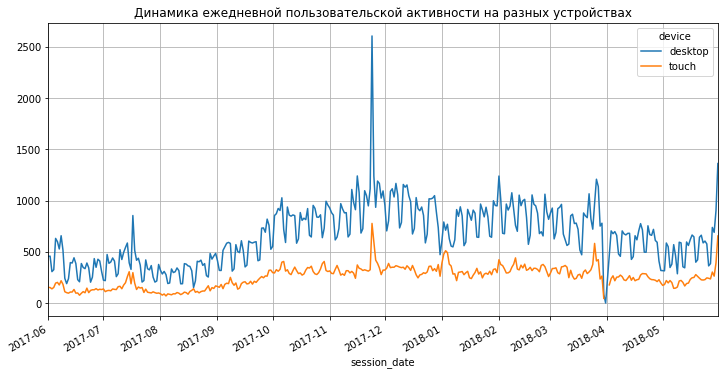

In [21]:
#Визуализируем как распределяются пользователи по типам устройств за период исследования
visits.pivot_table(index='session_date', columns='device', values='uid', aggfunc='nunique').plot(
    title='Динамика ежедневной пользовательской активности на разных устройствах',
figsize=(12, 6), grid=True);

Динамика пользовательской активности в течениие года мало зависит от типа устройств: пользователи и стационарных устройств и мобильных устройств имеют одинаковые тренды: активность снижается в теплое время года по причине отпусков и летних каникул. И возрастает к холодному времени года, достигая пика в декабре - время новогодних елок и длинных каникул. В конце марта случилось резкое падение просмотров, возможно сервис "лежал" по техническим причинам. 

In [22]:
#Посмотрим, из каких рекламных источников приходят пользователи ежедневно в среднем за день
dau_source_id = visits.groupby(['session_date', 'source_id']).agg({'uid':'nunique'}).reset_index()
dau_source_id.columns = ['session_date', 'source_id', 'n_users']
dau_source_id.groupby('source_id').agg({'n_users':'mean'}).astype(int)


,n_users
source_id,
1,80
2,120
3,232
4,275
5,175
6,1
7,1
9,36
10,26


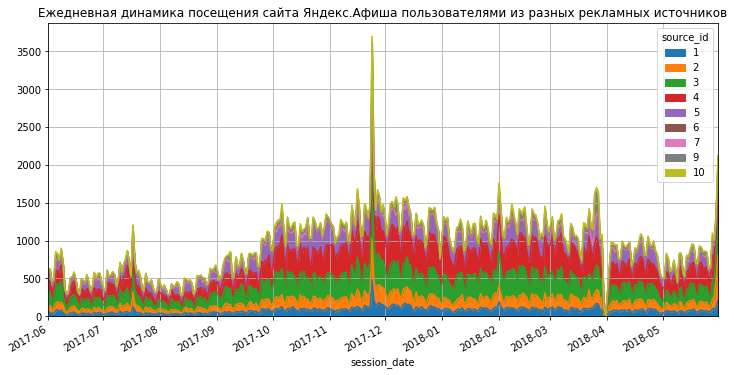

In [23]:
#Визуализируем эффективность разных рекламных источников в привлечении пользователей за весь период
visits.pivot_table(index='session_date', columns='source_id', values='uid', aggfunc='nunique').plot.area(
    title='Ежедневная динамика посещения сайта Яндекс.Афиша пользователями из разных рекламных источников', figsize=(12, 6), grid=True);

Ведущие рекламные источники для привлечения пользователей в порядке убывания: 4, 3, 5, 2, 1

In [24]:
#Посчитаем среднее количество уникальных пользователей в неделю
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
int(wau_total)

5716

In [25]:
#Посчитаем среднее количество уникальных пользователей в месяц
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
int(mau_total)

23228

Посчитаем фактор липкости для оценки регулярности использования нашего приложения.
«Sticky Factor» показывает, с какой вероятностью новый привлеченный пользователь останется в продукте, насколько хорошо продукт удерживает и «цепляет» пользователей.

In [26]:
sticky_factor = (dau_total / mau_total)*100
sticky_factor

uid    3.90897
dtype: float64

У нас всего 3.9%. Это означает, что пользователи привлекаются рекламными источниками в наше приложение, но не задерживаются в нем. Его удержание низкое, пользовательская база недостаточная для генерирования регулярного дохода. Первая рекомендация маркетологам: исследовать причины, почему пользователи заинтересованы в знакомстве с продуктом, но не заинтересованы возвращаться в приложение Яндекс.Афиша. Необходимо повысить заинтересованность нашим продуктом (привлечение целевой аудитории, актуальный контент, удобный интерфейс, возможность взаимодействия с пользователями и пользователей друг с другом, напоминание о продукте в виде рассылок и пр.)

### 1.2. Количество сессий в день

In [27]:
#Сгруппируем исходную таблицу со статистикой пользовательских сессий по дню активности и посчитаем 
#количество сессий в день
sessions = visits.groupby(['session_date']).agg({'uid': ['count', 'nunique']}).reset_index()
# переименуем столбец 'uid' на 'n_sessions'
sessions.columns = ['session_date', 'n_sessions', 'n_users']
sessions.head()

,session_date,n_sessions,n_users
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820


In [28]:
#Найдем количество сессий, которое приходится на одного пользователя в день для понимания регулярности
#использования приложения
sessions['sessions_per_user'] = sessions['n_sessions'] / sessions['n_users']
sessions['sessions_per_user'].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user, dtype: float64

Еще одно подтверждение, что пользователи после первой сессии неохотно возвращаются

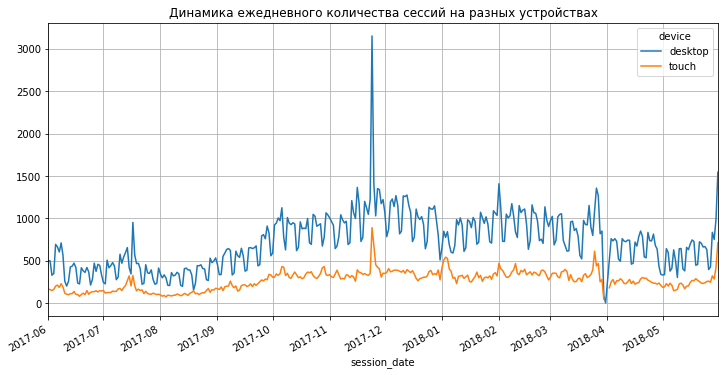

In [29]:
visits.pivot_table(index='session_date', columns='device', values='uid', aggfunc='count').plot(
    title='Динамика ежедневного количества сессий на разных устройствах',
figsize=(12, 6), grid=True);

Ежедневная динамика количества сессий мало отличается от динамики посещения нашего сайта новыми пользователями по причине того, что в среднем один новый пользователь посещает наш сайт один раз.  

### 1.3. Продолжительность одной сессии (ASL)

In [30]:
# Добавим столбец с длиной сессии
visits['session_duration_sec'] = (visits['end_ts'] - visits['starts_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,starts_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017,0


In [31]:
#Посмотрим описательные статистики параметра - продолжительность сессии
visits.groupby('device')['session_duration_sec'].describe(percentiles=[0.25, 0.5, 0.75, 0.99]).round()

,count,mean,std,min,25%,50%,75%,99%,max
device,,,,,,,,,
desktop,262567.0,704.0,1092.0,0.0,120.0,360.0,900.0,4860.0,84480.0
touch,96833.0,480.0,753.0,0.0,60.0,180.0,600.0,3240.0,30840.0


Пользователи в мобильном приложении Яндекс.Афиша проводят в 2 раза меньше времени, чем при открытии ресурса с ПК. Пользователям либо что-то не нравится в мобильном приложении либо есть какие-то проблемы с приложением. Еще одна особенность - большая разница между средним и медианным значением. Есть аномально высокая продолжительность сессий.  

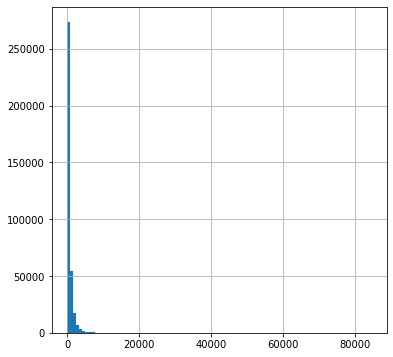

In [32]:
#Визуализируем данные продолжительности сессий за период исследования
visits['session_duration_sec'].hist(bins=100, figsize=(6, 6));

In [33]:
#Распределение продолжительности сессии отличается от нормального. Найдем моду продолжительности 
#сессии на ПК для получения метрики ASL - average session length - в зависимости от типа устройства
visits.query('device in "desktop"')['session_duration_sec'].mode()

0    60
dtype: int64

In [34]:
#Найдем моду продолжительности сессии на мобильном устройстве
visits.query('device in "touch"')['session_duration_sec'].mode()

0    60
dtype: int64

На всех видах устройств наиболее часто встречающаяся продолжительность сессии - 60 секунд. Этого времени хватает на то чтобы зайти оценить интерфейс и попытаться что-то найти или посмотреть для своей информации.  

Описательные статистики фиксируют также наличие сессий с нулевой длительностью. Проанализируем их

In [35]:
#Количество сессий в выборке с нулевой длительностью
len(visits.query('session_duration_sec==0'))

35794

In [36]:
# 9% процентов пользовательских сессий - с нулевой длительностью. Посмотрим, с каких устройств 
# подключались пользователи.
visits.query('session_duration_sec==0')['device'].value_counts()

desktop    23689
touch      12105
Name: device, dtype: int64

In [37]:
#Посмотрим с каких рекламных источников приходят пользователи с нулевой продолжительностью сессий
visits.query('session_duration_sec==0')['source_id'].value_counts()

4     10898
3      9025
5      7385
2      4158
1      1975
9      1297
10     1054
7         1
6         1
Name: source_id, dtype: int64

In [38]:
#Посмотрим, как распределяются нулевые сессии по датам
#visits.query('session_duration_sec==0').groupby('session_month')

Мы видим, что нулевая длительность сессий встречается при подключении и со стационарных ПК и с мобильных устройств. А также у пользователей, пришедших на сайт из всех имеющихся рекламных источников. Причиной нулевой длительности сессий может быть техническая проблема с сайтом. П

In [39]:
#В описательных статистиках мы обнаружили аномально высокую максимальную длительность пользовательской
#сессии. Найдем два верхних персентиля для понимания выбросов
visits['session_duration_sec'].describe(percentiles=[0.95, 0.99])

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
50%         300.000000
95%        2280.000000
99%        4500.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Длительность 99% всех сессий не превышает 75 минут, половина всех сессий не продолжительнее 5 минут,  причем типичная продолжительность сессии - 60 секунд. За одну минуту, как впрочем и за пять сложно что-то выбрать и оформить заказ. Предполагаем, что что-то пользователям не нравится в нашем сайте/приложении

### 1.4. Как часто люди возвращаются?

Посчитаем Retention rate (коэффициент удержания) для оценки частоты возвращения покупателей. Предварительно выделим когорты пользователей по неделям в таблице visits

In [40]:
# Для каждого пользователя найдем дату первого посещения сайта 
first_session_date = visits.groupby(['uid'])['starts_ts'].min()

first_session_date.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: starts_ts, dtype: datetime64[ns]

In [41]:
#Полученный объект Series объединим с исходным датафреймом visits, предварительно изменим название
#столбца объекта Series
first_session_date.name = 'first_session_date'
visits = visits.join(first_session_date, on='uid')
visits.head()

,device,end_ts,source_id,starts_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017,0,2017-12-27 14:06:00


Посмотрим из каких рекламных источников приходят новые пользователи в зависимости от типа устройства

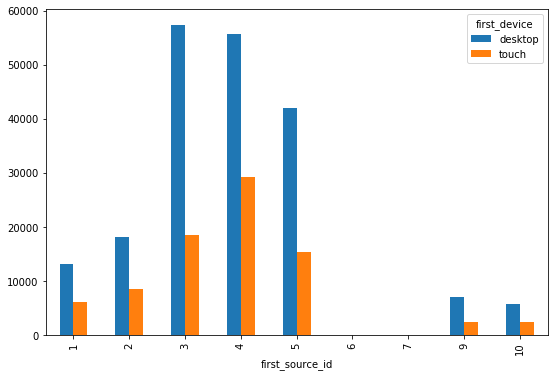

In [42]:
first_device_source = visits.groupby(['uid', 'device', 'source_id'])['starts_ts'].min().reset_index()
first_device_source.columns = ['uid', 'first_device', 'first_source_id', 'first_session_date']
first_device_source.head()
first_device_source.pivot_table(
    index='first_source_id', columns='first_device', values='uid', aggfunc='count').plot(
    kind='bar', figsize=(9, 6));

6 и 7 рекламные источники практически не эффективны в привлечении новых пользователей. Для пользователей на ПК эффективны в порядке приоритета 3, 4 и 5 рекламные источники, для мобильных пользователей соответственно 4, 3 и 5 рекламные источники 

In [43]:
#Выделим из столбца first_session_date месяц
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')


In [44]:
#Месяц, в котором произошла первая сессия станет когортой. Для каждой строки датафрейма рассчитаем
#lifetime в рамках когорты.
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)
visits['first_session_month'] = visits['first_session_month'].dt.strftime('%Y-%m')
visits.head()

,device,end_ts,source_id,starts_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_session_date,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,1080,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,1680,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,0,2017-07-01 01:54:00,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,1440,2018-03-09 20:05:00,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017,0,2017-12-27 14:06:00,2017-12,0


In [45]:
#Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных 
#пользователей на определённый «месяц жизни»:
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_session_month,cohort_lifetime,uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909


In [46]:
#Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, 
#и на него разделить число пользователей в каждый следующий месяц. Найдём исходное количество 
#пользователей в когорте. Возьмём их число на нулевой месяц:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count

,first_session_month,uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [47]:
#Переименуем столбец uid в cohort_users
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})


In [48]:
#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

In [49]:
#рассчитаем Retention Rate. Разделим количество активных пользователей в каждый из месяцев на 
#исходное число пользователей в когорте:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts.head()

,first_session_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


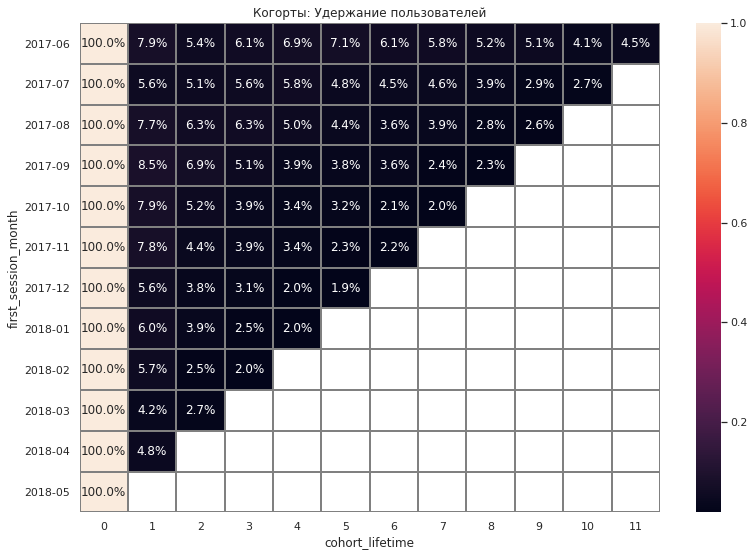

In [50]:
#Построим сводную таблицу и создадим тепловую карту:
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',
                                       values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Удержание пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

Мы видим удручающую картину: во всех когортах начиная со второго месяца существования снижается посещаемость сайта Яндекс.Афиша более чем в десять раз! Вопрос маркетологам: правильна ли выбрана целевая аудитория, работают ли маркетологи на всех ступенях воронки продаж или все ресурсы уходят на привлечение новых пользователей! Проблема однозначно в однобоком взаимодействии с пользователями и потенциальными заказчиками.

## 2. Продажи

### 2.1. Когда люди начинают покупать 


In [51]:
# Освежим в памяти структуру датафрейма orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [52]:
#Найдем конверсию пользователей в покупатели по всей выборке. Посчитаем число уникальных покупателей и разделим на
#число уникальных пользователей
users = visits['uid'].nunique()
buyers = orders['uid'].nunique()
conversion = buyers/users*100
conversion

16.006994815246596

16% людей посещающих сайт Яндекс.Афиша за исследуемый период времени становятся покупателями. В целом неплохой показатель.

In [53]:
# найдем дату совершения первой покупки пользователем
first_order_date = orders.groupby('uid')['buy_ts'].min().astype('datetime64')
first_order_date.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

In [54]:
#Переименуем столбец объекта Series и объединим полученную таблицу с исходным датафреймом orders
first_order_date.name = 'first_order_date'
first_order_date.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

In [55]:
#Объединим таблицу first_order_date с датафреймом orders
orders = orders.join(first_order_date, on = 'uid')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
buy_ts              50415 non-null datetime64[ns]
revenue             50415 non-null float64
uid                 50415 non-null uint64
first_order_date    50415 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


In [56]:
#Добавим из объекта Series first_session_date 
orders = orders.join(first_session_date, on = 'uid')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
buy_ts                50415 non-null datetime64[ns]
revenue               50415 non-null float64
uid                   50415 non-null uint64
first_order_date      50415 non-null datetime64[ns]
first_session_date    50415 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 1.9 MB


In [57]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_session_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


In [58]:
#Добавим в таблицу столбец time_to_order с информацией о временном промежутке между первой сессией
#и первым заказом в минутах
orders['time_to_order'] = orders['first_order_date'] - orders['first_session_date']
orders.head()

,buy_ts,revenue,uid,first_order_date,first_session_date,time_to_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,00:27:00


In [59]:
#Преобразуем период от начала первой сессии до первой покупки в минуты
orders['time_to_order'] = orders['time_to_order'].astype('timedelta64[m]')
orders['time_to_order'].describe()


count     50415.000000
mean      25368.990618
std       66910.801873
min           0.000000
25%           4.000000
50%          22.000000
75%        6231.000000
max      523144.000000
Name: time_to_order, dtype: float64

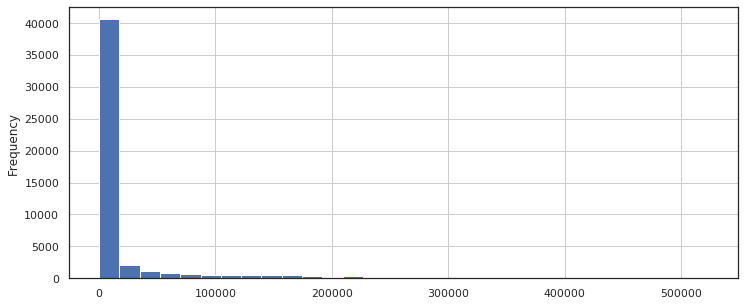

In [60]:
#Визуализируем разницу между первой сессией и первой покупкой
orders['time_to_order'].plot.hist(bins=30, grid=True, figsize=(12, 5));

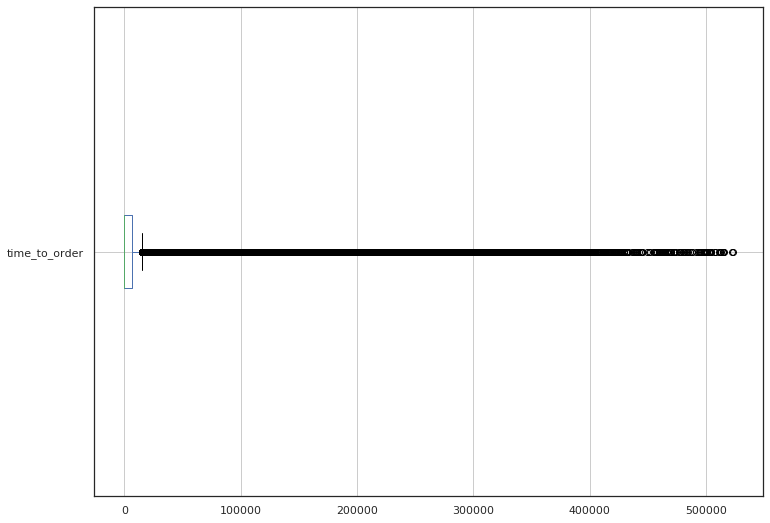

In [61]:
orders.boxplot('time_to_order', vert=False, figsize=(12, 9));

Видим сильный скос данных вправо. 50% покупателей принимают решение о покупке менее чем через 22 минуты после первой сессии. 25% пользователей думают до 4 дней, оставшиейся 25% возвращаются за покупкой еще позже. Рекомендация маркетологам: увеличить количество покупателей, которые быстро принимают решения о покупке или помочь покупателям быстрее определиться с принятием решения о покупке.

In [62]:
#Найдем конверсию пользователей в покупатели по когортам пользователей. 
#Сначала добавим столбец с датой совершения первого заказа в датафрейм visits
visits = visits.join(first_order_date, on = 'uid')
visits.head()

,device,end_ts,source_id,starts_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_session_date,first_session_month,cohort_lifetime,first_order_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,1080,2017-12-20 17:20:00,2017-12,0,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,1680,2018-02-19 16:53:00,2018-02,0,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,0,2017-07-01 01:54:00,2017-07,0,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,1440,2018-03-09 20:05:00,2018-03,2,2018-03-09 20:25:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017,0,2017-12-27 14:06:00,2017-12,0,NaT


In [63]:
#Посмотрим с каких устройств впервые пришли к нам будущие покупатели
buyers_first_session_device = visits.query('~first_order_date.isnull()').groupby(['uid', 'device'])['starts_ts'].min().reset_index()
buyers_first_session_device['device'].value_counts()

desktop    30602
touch       8912
Name: device, dtype: int64

In [64]:
#также оценим соотношение устройств в первых сессиях во всем датафрейме visits
users_first_session_device = visits.groupby(['uid', 'device'])['starts_ts'].min().reset_index()
users_first_session_device['device'].value_counts()

desktop    164523
touch       71345
Name: device, dtype: int64

77% покупателей впервые зашли на наш ресурс с ПК, 23% покупателей - с мобильных устройств. 
Соотношение устройств в первых пользовательских сессиях без учета факта дальнейших покупок: 70% и 40% соответственно. Получается пользователи, которые знакомятся с нашим ресурсом с ПК охотнее становятся нашими покупателями. Маркетологам: акцентируйте внимание на оптимизацию приложения/рекламы для мобильных пользователей!

In [65]:
#Найдем число покупателей в каждой когорте пользователей и добавим общее число пользователей когорт
#из таблицы initial_users_count (см. выше)
users_to_buyers= visits.query('~first_order_date.isnull()').groupby(['first_session_month']).agg({'uid':'nunique'}).reset_index()
users_to_buyers = users_to_buyers.rename(columns={'uid':'cohort_buyers'})
users_to_buyers=users_to_buyers.merge(initial_users_count, on='first_session_month')
users_to_buyers['retention'] = users_to_buyers['cohort_buyers'] / users_to_buyers['cohort_users']*100
users_to_buyers

,first_session_month,cohort_buyers,cohort_users,retention
0,2017-06,2923,13259,22.045403
1,2017-07,2458,13140,18.706240
2,2017-08,1721,10181,16.904037
3,2017-09,3058,16704,18.306992
4,2017-10,4678,25977,18.008238
5,2017-11,4262,27248,15.641515
6,2017-12,4074,25268,16.123160
7,2018-01,3119,22624,13.786245
8,2018-02,3186,22197,14.353291
9,2018-03,2838,20589,13.784059


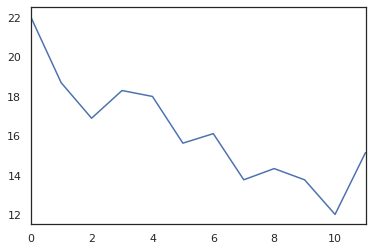

In [66]:
users_to_buyers['retention'].plot();

In [67]:
users_to_buyers['retention'].describe()

count    12.000000
mean     16.237876
std       2.738279
min      12.031320
25%      14.211529
50%      15.882337
75%      18.082927
max      22.045403
Name: retention, dtype: float64

Максимальная конверсия пользователей в покупатели наблюдается в первой пользовательской когорте. В каждой последующей когорте конверсия уменьшается.  

In [68]:
#Посмотрим с каким первым рекламным источником столкнулись наши будущие покупатели и сколько 
#было покупателей пришли от того или иного первого рекламного источника

In [69]:
first_source = visits.query('~first_order_date.isnull()').groupby(['uid', 'source_id'])['starts_ts'].min().reset_index()
first_source['source_id'].value_counts()

4     14253
3     13846
5     10156
2      7305
1      7138
9      2793
10     1773
7         1
Name: source_id, dtype: int64

Мы видим повторение тренда, который выявили при анализе пользовательской активности. Рекламные источники 4, 3, 5 являются наиболее активными в привлечении  новых пользователей и потенциальных покупателей

### 2.2. Сколько раз покупают за период и какой средний чек

In [70]:
#Найдем, сколько покупок приходится на одного покупателя за весь период исследования
#Общее количество заказов за период:
n_orders = orders['uid'].count()
#Общее количество покупателей за период:
n_buyers = orders['uid'].nunique()
#Количество покупок на 1 покупателя:
n_orders_per_buyer = n_orders/n_buyers
n_orders_per_buyer

1.3803630588943954

На одного покупателя в среднем приходится 1.38 покупки за весь период исследования (около 1 года). Немного.

In [71]:
#Посчитаем, сколько денег нам принесли покупатели:
total_revenue = orders['revenue'].sum()
total_revenue

252057.19999999998

In [72]:
#Посмотрим активность покупателей выборки. Для этого создадим в датафрейме orders новые столбцы:
#месяц первой покупки (когорта покупателей), год покупки, месяц покупки, неделю покупки
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_year'] = orders['buy_ts'].dt.year
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_week'] = orders['buy_ts'].dt.week

orders.head()

,buy_ts,revenue,uid,first_order_date,first_session_date,time_to_order,first_order_month,order_year,order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06-01,2017,2017-06-01,22
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06-01,2017,2017-06-01,22
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06-01,2017,2017-06-01,22
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06-01,2017,2017-06-01,22
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06-01,2017,2017-06-01,22


In [73]:
#Сгруппируем покупателей по месяцам соверешения заказов. Найдем средний чек за весь период наблюдений 

month_orders = orders.groupby(['order_month']).agg({'uid':['count', 'nunique'], 'revenue':'mean'}).reset_index()
month_orders.columns=['order_month','n_orders','n_buyers', 'average_bill']
month_orders.head()


,order_month,n_orders,n_buyers,average_bill
0,2017-06-01,2354,2023,4.060106
1,2017-07-01,2363,1984,5.306589
2,2017-08-01,1807,1472,4.847139
3,2017-09-01,3387,2750,5.416448
4,2017-10-01,5679,4675,4.928280


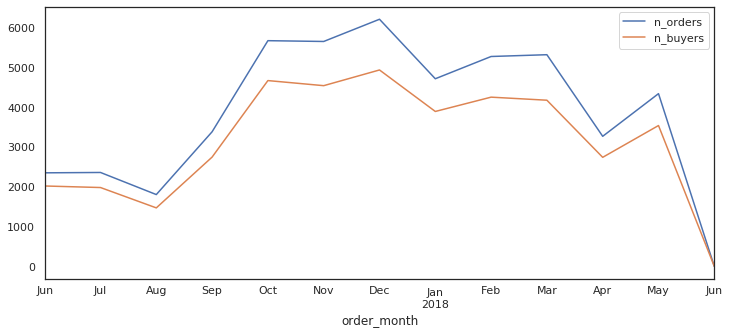

In [74]:
#Визуализируем динамику количества заказов, покупателей, среднего чека по месяцам
month_orders.plot(x='order_month', y=['n_orders', 'n_buyers'], figsize=(12, 5));

Характер графиков одинаковый: и количество покупателей и количество их заказов растут с наступлением осени и вплоть до нового года. В январе - резкий спад и дальнейшее снижение к началу лета. 

В июне мы отмечаем резкое снижение и заказов и покупателей. Предполагаем, что в нашу базу выгрузили не всю базу за июнь 2018 года. Проверим:

In [75]:
orders.query('order_month=="2018-06-01"')

,buy_ts,revenue,uid,first_order_date,first_session_date,time_to_order,first_order_month,order_year,order_month,order_week
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01 00:02:00,2018-05-31 23:59:00,3.0,2018-06-01,2018,2018-06-01,22


Да, так и есть: наша база ограничена 31 мая 2018 по пользовательским сессиям. Последний пользователь открыл наш ресурс около 24.00 31 мая и совершил заказ уже в июне. А больше данных за июнь у нас нет. Нам нужно июнь исключить из наших стат. расчетов во избежание искажений данных.

In [76]:
month_orders.query('order_month!="2018-06-01"').describe()

,n_orders,n_buyers,average_bill
count,12.000000,12.000000,12.000000
mean,4201.166667,3418.166667,4.956925
std,1511.972092,1183.258508,0.521265
min,1807.000000,1472.000000,4.060106
25%,3045.500000,2563.750000,4.780459
50%,4533.500000,3721.000000,4.887709
75%,5409.250000,4330.250000,5.333424
max,6218.000000,4942.000000,5.852139


Средний чек (медиана) по месячным когортам покупателей около 4.89. А у 75% покупателей средний чек не выше 5.30. Посмотрим на временном графике, есть ли какие особенности

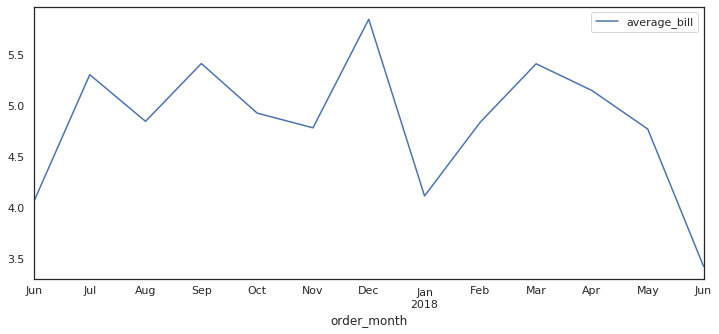

In [77]:
#Посмотрим на динамику среднего чека по месяцам. 
month_orders.plot(x='order_month', y='average_bill', figsize=(12, 5));

Средний чек колеблется в весьма скромных пределах от 4 до 5.5 единиц. Резко увеличивается к новому года и также резко падает в январе. 

Рекомендация маркетологам: поработать с существующей покупательской базой, чтобы увеличить число заказов на одного покупателя и восполнить резкое падение продаж в периоды спада продаж (январь и летние месяцы). Возможно ввести акции или бонусные программы, чтобы покупатели были более активны в периоды падения спроса на наш продукт

### 2.3. Сколько приносят денег (Lifetime value)

In [78]:
#Посчитаем количество новых покупателей за каждый месяц
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [79]:
#Выделим когорты по месяцу первого заказа. Сгруппируем таблицу заказов по месяцу первой покупки и 
#месяцу каждого заказа и сложим выручку.
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [80]:
#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [81]:
#Добавим столбец с возрастом когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [82]:
#Найдем LTV. Разделим прибыль когорт за каждый месяц на общее число пользователей в 
#каждой когорте. 
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [83]:
#Для наглядности визуализируем когорты в виде сводной таблицы и посмотрим, как меняется кумулятивно
#ltv:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv')
output=output.cumsum(axis=1).round(2)
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#сделаем срез когорт, которые прожили полных 6 месяцев и сравним их прибыльность
ltv_6_month_age_cohorts = report.query('first_order_month <"2018-01-01" and age<6').pivot_table(
        index='first_order_month', values='ltv', aggfunc='sum')
ltv_6_month_age_cohorts

,ltv
first_order_month,
2017-06-01,8.360084
2017-07-01,7.660775
2017-08-01,7.375861
2017-09-01,12.306463
2017-10-01,6.159956
2017-11-01,6.280316
2017-12-01,7.639913


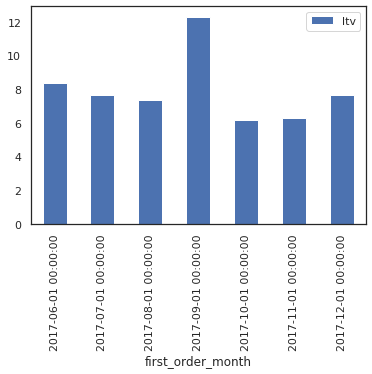

In [85]:
ltv_6_month_age_cohorts.plot(kind='bar');

Из всех отобранных одновозрастных когорт самой прибыльной оказалась когорта пользователей, привлеченная в сентябре. Интересно, какие рекламыне источники были первыми для этих пользователей-покупателей.

In [86]:
#вспомним таблицу 
first_source.head()


,uid,source_id,starts_ts
0,313578113262317,2,2017-09-18 22:49:00
1,1575281904278712,10,2017-06-03 10:13:00
2,2429014661409475,3,2017-10-11 17:14:00
3,2464366381792757,5,2018-01-27 20:10:00
4,2551852515556206,5,2017-11-24 10:14:00


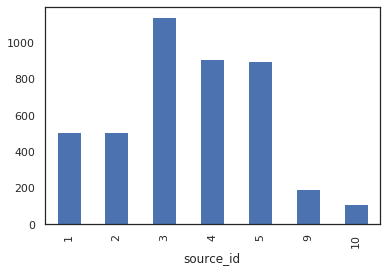

In [87]:
#сделаем срез данных
first_source.query('"2017-08-31 23:59:59"<starts_ts<"2017-10-01 00:00:00"').groupby('source_id')['uid'].count().plot(kind='bar');

Каких-то отличий с трендом по всей выборке в плане приоритетности по источникам не наблюдаем. Можно предположить, что в сентябре приходит целевая аудитория сезонных мероприятий - театралы, а также семьи с детьми после летних каникул, соскучившиеся по паркам развлечений и кино. Рекомендация маркетологам: обратиться к этим целевым аудиториям для привлечения новых покупателей.

## 3. Маркетинг

### 3.1.Сколько денег потратили? Всего / на каждый источник / по времени

In [88]:
# Посмотрим еще раз на наш исходный датафрейм по расходам
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [89]:
#Сколько потратили всего на привлечение покупателей
total_costs = costs['costs'].sum()
total_costs

329131.62

In [90]:
#Посчитаем ROMI
ROMI_total = total_revenue/total_costs*100
ROMI_total

76.58249304639888

Затраты на привлечение покупателей не окупаются, компания терпит убыток порядка 24%. Детализируем и посмотрим, где есть проблемы с точки зрения затрат. 

In [91]:
#Добавим колонку с месяцем затрат
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
month        2542 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
month    12 non-null datetime64[ns]
costs    12 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 320.0 bytes


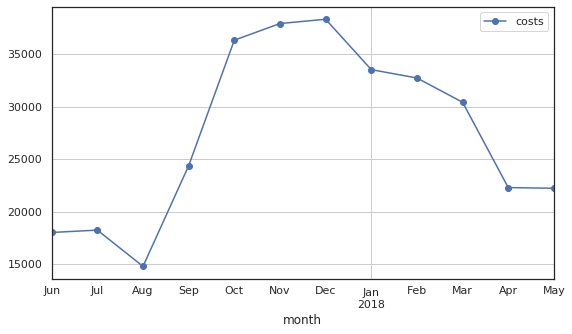

In [92]:
#Сгруппируем расходы по месяцам и визуализируем динамику
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs['month'] = monthly_costs['month'].astype('datetime64[M]')
monthly_costs.info()
monthly_costs.plot(style='o-', x='month', grid=True, figsize=(9, 5));

In [93]:
#Сгруппируем расходы по рекламному источнику и визуализируем динамику

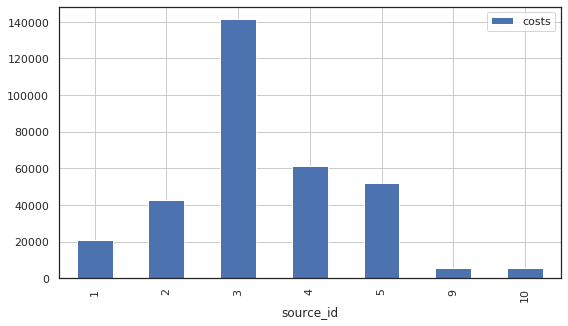

In [94]:
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()
source_costs.plot(kind='bar', x='source_id', grid=True, figsize=(9, 5));

Наш маркетинг не тратит деньги на рекламные источники 6, 7 и 8.

Посчитаем ROMI по месяцам


In [95]:
#Вернемся к датафрейму orders и посчитаем суммарную прибыль от покупателей по месяцам
monthly_revenue = orders.groupby('order_month')['revenue'].sum().reset_index()
monthly_revenue.columns = ['month','revenue']
monthly_revenue['month'] = monthly_revenue['month'].astype('datetime64[M]')
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
month      13 non-null datetime64[ns]
revenue    13 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


In [96]:
#Объединим две полученные таблицы месячных расходов и доходов.
revenue_costs = monthly_revenue.merge(monthly_costs, on='month', how='inner')
revenue_costs

,month,revenue,costs
0,2017-06-01,9557.49,18015.00
1,2017-07-01,12539.47,18240.59
2,2017-08-01,8758.78,14790.54
3,2017-09-01,18345.51,24368.91
4,2017-10-01,27987.70,36322.88
5,2017-11-01,27069.93,37907.88
6,2017-12-01,36388.60,38315.35
7,2018-01-01,19417.13,33518.52
8,2018-02-01,25560.54,32723.03
9,2018-03-01,28834.59,30415.27


In [97]:
#Добавим столбец ROMI:
revenue_costs['romi'] = (revenue_costs['revenue'] / revenue_costs['costs']*100).round()
revenue_costs

,month,revenue,costs,romi
0,2017-06-01,9557.49,18015.00,53.0
1,2017-07-01,12539.47,18240.59,69.0
2,2017-08-01,8758.78,14790.54,59.0
3,2017-09-01,18345.51,24368.91,75.0
4,2017-10-01,27987.70,36322.88,77.0
5,2017-11-01,27069.93,37907.88,71.0
6,2017-12-01,36388.60,38315.35,95.0
7,2018-01-01,19417.13,33518.52,58.0
8,2018-02-01,25560.54,32723.03,78.0
9,2018-03-01,28834.59,30415.27,95.0


Наш маркетинг не оправдывает свои затраты: ни в одном из месяцев исследуемого периода не вышли на окупаемость затрат. Маркетинг работает неэффективно. 

### 3.2. Сколько стоило привлечение одного покупателя из каждого источника?

In [98]:
#посмотрим еще раз на ранее созданный датафрейм
first_source.head()

,uid,source_id,starts_ts
0,313578113262317,2,2017-09-18 22:49:00
1,1575281904278712,10,2017-06-03 10:13:00
2,2429014661409475,3,2017-10-11 17:14:00
3,2464366381792757,5,2018-01-27 20:10:00
4,2551852515556206,5,2017-11-24 10:14:00


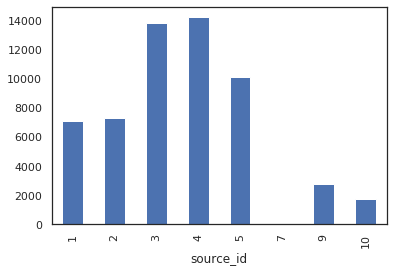

In [99]:
#сгруппируем по рекламному источнику и посмотрим число уникальных покупателей, которые впервые пришли
#на наш с того или иного источника
source_n_buyers = first_source.groupby('source_id')['uid'].count()
source_n_buyers.name = 'n_buyers'
source_n_buyers.reset_index()
source_n_buyers.plot(kind='bar', x='source_id');

In [100]:
# посмотрим еще раз на ранее созданный датафрей 
source_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [101]:
source_costs = source_costs.merge(source_n_buyers, on='source_id')
source_costs

,source_id,costs,n_buyers
0,1,20833.27,7138
1,2,42806.04,7305
2,3,141321.63,13846
3,4,61073.60,14253
4,5,51757.10,10156
5,9,5517.49,2793
6,10,5822.49,1773


In [102]:
#НАйдем стоимость привлечения одного покупателя по рекламным источникам
source_costs['cac'] = (source_costs['costs'] / source_costs['n_buyers']).round()
source_costs

,source_id,costs,n_buyers,cac
0,1,20833.27,7138,3.0
1,2,42806.04,7305,6.0
2,3,141321.63,13846,10.0
3,4,61073.60,14253,4.0
4,5,51757.10,10156,5.0
5,9,5517.49,2793,2.0
6,10,5822.49,1773,3.0


In [103]:
#Посчитаем CAC по когортам покупателей. Добавим данные о помесячных расходах в таблицу report, которую
#создавали ранее
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()


,first_order_month,n_buyers,order_month,revenue,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06-01,18015.0,8.905091


In [104]:
#Рассчитаем ROMI: поделим LTV на CAC. Чтобы посчитать накопительный ROMI, вызовем метод cumsum() 
#(от англ. cumulative sum, «накапливаемая сумма»). 
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi')



In [105]:
output.cumsum(axis=1).round(2)


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как и в расчетах ltv сделаем срез когорт, которые прожили полных 6 месяцев. И сравним, как меняются их ROMI. 

In [106]:
report_new.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,month,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06-01,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06-01,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06-01,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06-01,18015.0,8.905091,0.114825


In [107]:
romi_6_months_age =  report_new.query(
    'first_order_month<"2018-01-01" and age<6').pivot_table(
        index='first_order_month', values='romi', aggfunc='sum')
romi_6_months_age

,romi
first_order_month,
2017-06-01,0.938798
2017-07-01,0.807631
2017-08-01,0.683202
2017-09-01,1.303422
2017-10-01,0.736016
2017-11-01,0.676112
2017-12-01,0.873951


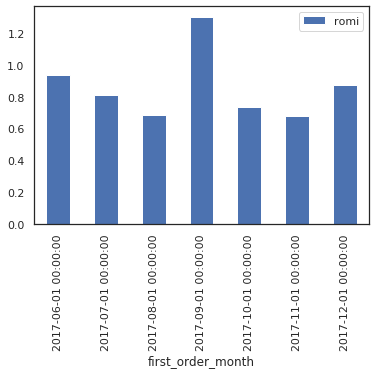

In [108]:
romi_6_months_age.plot(kind='bar');

Единственная когорта, которая окупается через 6 месяцев жизни -сентябрьская. Причем она окупила затраты в 4 месяц своего существования. Также близка к окупаемости первая, июньская когорта и декабрьская. Интересно, что затраты на маркетинг в летние месяцы и в сентябре минимальные. Основные траты маркетологи делают в октябре-ноябре-декабре. Однако если учесть, что 50% наших пользователей принимают решение о покупке в течение 22 минут, эти траты малоэффективны, потому что возврат маркетинговых инвестиций на уровне когорт июля, августа, когда вложения в рекламу минимальные. 

In [109]:
#Посчитаем окупаемость средней когорты
output.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем затраты на привлечение покупателей начинают окупаться через 8 полных месяцев регулярных покупок. 

Екатерина, приветствую! Хотелось бы прокомментировать свои действия и логику.  В начале этого раздела мы рассматривали окупаемость маркетинговых затрат по месяцам без привязки к когорте пользователей: сколько потратили в месяц, сколько вернули в виде прибыли. Выяснили, что ни в одном из месяцев затраты не окупаются. Но в этом годовом периоде у нас есть покупатели, которые совершают покупки уже на протяжении 12 месяцев, а есть те, кто пришел неделю назад, но тоже попал в отчет. Поэтому наша задача в этом разделе рассмотреть когорты покупателей, привлеченных в определенный месяц, чтобы определить, через сколько месяцев регулярных покупок, конкретная когорта покупателей станет рентабельной. Отсюда выбор средней когорты со средними romi по месяцам жизни. В средней когорте romi за первый месяц жизни мы посчитали как среднеарифметическое romi всех когорт за первый месяц и т.д. по месяцам. Такая методика освещалась в тренажере и выглядит вполне логичной. Единственное, что у нас для расчета среднего за 9, 10, 11 месяц жизни недостаточно данных. Хорошо бы оценить окупаемость средней когорты, когда все когорты прошли 12 месячный цикл. Но в нашем проекте этих данных нет. 

## Выводы

1. Пользователи входят в приложение Яндекс.Афиша преимущественно со стационарных ПК. Более того, Пользователи в мобильном приложении Яндекс.Афиша в среднем проводят в 2 раза меньше времени, чем при открытии ресурса с ПК. Задача маркетологам: повысить привлекательность нашего приложения для мобильных пользователей.
2.Динамика пользовательской активности в течениие года мало зависит от типа устройств: пользователи и стационарных устройств и мобильных устройств имеют одинаковые тренды: активность снижается в теплое время года по причине отпусков и летних каникул. И возрастает к холодному времени года, достигая пика в декабре - время новогодних елок и длинных каникул. 
3.Ведущие рекламные источники для привлечения пользователей в порядке убывания: 4, 3, 5, 2, 1
4.Фактор липкости всего 3.9%. Это означает, что пользователи привлекаются рекламными источниками в наше приложение, но не задерживаются в нем. Его удержание низкое, пользовательская база недостаточная для генерирования регулярного дохода. Рекомендация маркетологам: исследовать причины, почему пользователи заинтересованы в знакомстве с продуктом, но не заинтересованы возвращаться в приложение Яндекс.Афиша. Необходимо повысить заинтересованность нашим продуктом (привлечение целевой аудитории, актуальный контент, удобный интерфейс, возможность взаимодействия с пользователями и пользователей друг с другом, напоминание о продукте в виде рассылок и пр.)
5. Длительность 99% всех сессий не превышает 75 минут, половина всех сессий не продолжительнее 5 минут, причем типичная продолжительность сессии - 60 секунд. За одну минуту, как впрочем и за пять сложно что-то выбрать и оформить заказ. Предполагаем, что что-то пользователям не нравится в нашем сайте/приложении, может быть цена продуктов/услуг?
6. 6 и 7 рекламные источники практически не эффективны в привлечении новых пользователей. Но и маркетологои не тратят бюджет на раскрутку этих рекламных источников.  Для пользователей на ПК эффективны в порядке приоритета 3, 4 и 5 рекламные источники, для мобильных пользователей соответственно 4, 3 и 5 рекламные источники.
7.Во всех когортах начиная со второго месяца существования снижается посещаемость сайта Яндекс.Афиша более чем в десять раз! Вопрос маркетологам: правильна ли выбрана целевая аудитория, работают ли маркетологи на всех ступенях воронки продаж или все ресурсы уходят на привлечение новых пользователей! Проблема однозначно в однобоком взаимодействии с пользователями и потенциальными заказчиками.
8.16% людей посещающих сайт Яндекс.Афиша за исследуемый период времени становятся покупателями. 
9. 50% покупателей принимают решение о покупке менее чем через 22 минуты после первой сессии. 25% пользователей думают до 4 дней, оставшиейся 25% возвращаются за покупкой еще позже. Рекомендация маркетологам: увеличить количество покупателей, которые быстро принимают решения о покупке или помочь покупателям быстрее определиться с принятием решения о покупке.
10.Максимальная конверсия пользователей в покупатели наблюдается в первой пользовательской когорте. В каждой последующей когорте конверсия уменьшается. На одного покупателя в среднем приходится 1.38 покупки за весь период исследования (около 1 года).
11. количество покупателей и количество их заказов растут с наступлением осени и вплоть до нового года. В январе - резкий спад и дальнейшее снижение к началу лета. 
12.Средний чек колеблется в весьма скромных пределах от 4 до 5.5 единиц. Резко увеличивается к новому года и также резко падает в январе.
Рекомендация маркетологам: поработать с существующей покупательской базой, чтобы увеличить число заказов на одного покупателя и восполнить резкое падение продаж в периоды спада продаж (январь и летние месяцы). Возможно ввести акции или бонусные программы, чтобы покупатели были более активны в периоды естественного падения спроса на наш продукт.
13. Самая прибыльная когорта - сентябрьская, она четвертая по счету за наш период ислледования, далее по убыванию:первая июньская, августовская, июльская. Интересно, что затраты на привлечение пользователей в этот период были одни из самых низких. 
14 Затраты на привлечение покупателей в целом не окупаются, компания терпит убыток порядка 24%. Детализируем и посмотрим, где есть проблемы с точки зрения затрат.
15.В нашей выборке самая продуктивная когорта - сентябрьская. Окупила затраты в 4 месяц своего существования. На втором месте - первая когорта, участники которой сделали первый заказ в июне 2017 года. Окупила себя на 7 месяц своего существования. Все остальные когорты за период исследования себя не окупили. Средняя когорта будет окупаться в конце 8 месяца. 